In [91]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import glob

In [70]:
#Choice = 1 if you have access to the data but not train/test data .txt files
#Choice = 0 if you have train/test data .txt files

choice = 0

#Number of data points to take per batch
no_points = 5000

Saving 3D Arrays:
https://www.geeksforgeeks.org/how-to-load-and-save-3d-numpy-array-to-file-using-savetxt-and-loadtxt-functions/

In [71]:
#Loops through all .csv files containing normal and imbalanced data, 
#takes first 5000 points from each, assigns label in separate array
if choice == 1:
    files_no = glob.glob('normal/*.csv')
    folders_im = glob.glob('imbalance/*')
    train_data = np.empty((382,no_points,8), float)
    test_data = np.empty((382,no_points,8), float)
    i=0
    for f_on in files_no:
        source_data = np.loadtxt(f_on, delimiter=",")
        train_data[i,:,:] = source_data[0:no_points,:]
        test_data[i,:,:] = source_data[no_points:no_points*2,:]
        i=i+1

    for folder in folders_im:
        files_im = glob.glob( folder +'/*.csv')
        for f_im in files_im:
            source_data = np.loadtxt(f_im, delimiter=",")
            train_data[i,:,:] = source_data[0:no_points//6,:]
            test_data[i,:,:] = source_data[no_points//6:no_points//6*2,:]
            i=i+1
    
    train_reshaped = np.reshape(train_data,(train_data.shape[0],-1))
    test_reshaped = np.reshape(test_data,(train_data.shape[0],-1))
    
    np.savetxt("train_data_equal.txt", train_reshaped)
    np.savetxt("test_data_equal.txt", test_reshaped)
    
    train_label = np.zeros(49)
    train_label = np.append(train_label, np.ones(333), axis=0)
    test_label = np.zeros(49)
    test_label = np.append(test_label, np.ones(333), axis=0)

    np.savetxt("train_label.txt", train_label)
    np.savetxt("test_label.txt", test_label)
    
    print("Finished parsing the files")

In [72]:
#Loads train/test data from .txt files to np arrays
if choice == 0:    
    train_reload = np.loadtxt("train_data.txt")
    test_reload = np.loadtxt("test_data.txt")

    train_data = np.reshape(train_reload,(train_reload.shape[0],train_reload.shape[1]//8, 8))
    test_data = np.reshape(test_reload,(test_reload.shape[0],test_reload.shape[1]//8, 8))
    

    train_label = np.loadtxt('train_label.txt').astype(int)
    test_label = np.loadtxt('test_label.txt').astype(int)
    
    print(train_label.shape)
    print("Loaded data files...")

(382,)
Loaded data files...


In [73]:
#Splits the batch of 5000 into ten batches of 500
train_data = train_data.reshape(train_data.shape[0]*10,int(no_points/10),8, 1)
test_data = test_data.reshape(test_data.shape[0]*10, int(no_points/10), 8, 1)
train_label = np.zeros(490)
train_label = np.append(train_label, np.ones(3330), axis=0)
test_label = np.zeros(490)
test_label = np.append(test_label, np.ones(3330), axis=0)

In [74]:
#Load prediction data
pred_load = np.loadtxt("pred_data.txt")
pred_data = np.reshape(pred_load,(pred_load.shape[0],pred_load.shape[1]//8, 8, 1))
pred_label = np.loadtxt("pred_label.txt")

In [85]:
#Build the model
model = Sequential()
model.add(Conv2D(30, (3, 3), input_shape=(500, 8, 1), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 498, 6, 30)        300       
_________________________________________________________________
dropout_7 (Dropout)          (None, 498, 6, 30)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 89640)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               11474048  
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                

In [86]:
history =  model.fit(train_data, train_label, validation_data=(test_data, test_label), epochs=10, batch_size=32)

Epoch 1/10
120/120 [==============================] - 3s 13ms/step - loss: 0.2963 - accuracy: 0.8983 - val_loss: 0.1067 - val_accuracy: 0.9589
Epoch 2/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0766 - accuracy: 0.9751 - val_loss: 0.0850 - val_accuracy: 0.9647
Epoch 3/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0544 - accuracy: 0.9813 - val_loss: 0.0744 - val_accuracy: 0.9736
Epoch 4/10
120/120 [==============================] - 1s 11ms/step - loss: 0.0437 - accuracy: 0.9847 - val_loss: 0.0590 - val_accuracy: 0.9783
Epoch 5/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0356 - accuracy: 0.9865 - val_loss: 0.0893 - val_accuracy: 0.9720
Epoch 6/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0568 - accuracy: 0.9862 - val_loss: 0.0542 - val_accuracy: 0.9843
Epoch 7/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.1204 - val_accuracy: 0.9634

In [94]:
test_accuracy = model.evaluate(test_data, test_label)

120/120 [==============================] - 0s 4ms/step - loss: 0.0454 - accuracy: 0.9835


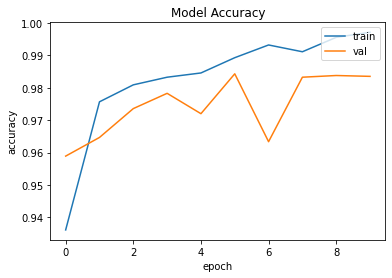

In [101]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [102]:
model.evaluate(pred_data, pred_label)

120/120 [==============================] - 0s 3ms/step - loss: 0.0681 - accuracy: 0.9793


[0.06813462823629379, 0.9793193936347961]

In [103]:
# print(pred_data.shape)
# print(pred_label.shape)
prediction = model.predict_classes(pred_data)
prediction = prediction.reshape(prediction.shape[0])
print(prediction.shape)
print(1-sum(prediction != pred_label)/3820)

C:\Users\Amir\anaconda3\envs\tf-gpu-new\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(3820,)
0.9793193717277487
